In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_excel('tweets_beforecoup_2.xlsx', engine='openpyxl')

In [4]:
df1=df1[['content','date','polarity']]

In [5]:
df1=df1.dropna()

In [6]:
df1.copy()
df1["polarity"].replace({"nt": "Neutral", "p": "Positive","n":"Negative"}, inplace=True)

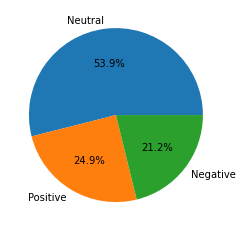

Neutral     1081
Positive     499
Negative     424
Name: polarity, dtype: int64

In [8]:
plt.pie(df1['polarity'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%1.1f%%')
plt.show()
df1['polarity'].value_counts()


In [24]:
df2=pd.read_excel('tweets_aftercoup_2.xlsx', engine='openpyxl')

In [25]:
df2=df2[['content','date','polarity ']]

In [28]:
df2=df2.rename(columns = {'polarity ':'polarity'})

In [30]:
df2.copy()
df2["polarity"].replace({"nt": "Neutral", "p": "Positive","n":"Negative"}, inplace=True)

In [ ]:
df2

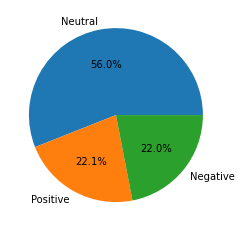

Neutral     1120
Positive     441
Negative     439
Name: polarity, dtype: int64

In [31]:
plt.pie(df2['polarity'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%1.1f%%')
plt.show()
df2['polarity'].value_counts()

In [32]:
df=pd.concat([df1,df2])

In [33]:
df=df.reset_index()

In [34]:
df

,index,content,date,polarity
0,0,Başkanlık sistemi gelirse Türkiye daha büyük T...,2016-04-28 16:33:48+00:00,Positive
1,1,Başkanlık sistemi ile acaba bugünkü muktedirle...,2016-04-28 16:33:45+00:00,Negative
2,2,"Odaklandığın başkanlık sistemi, başını yer inş...",2016-04-28 16:31:56+00:00,Negative
3,3,Baskanlik sistemi gelirse bu ulke biter ama in...,2016-04-28 16:31:38+00:00,Negative
4,4,Kürsü Genç Hukukçularda\nParlamenter ve Başkan...,2016-04-28 16:30:50+00:00,Neutral
...,...,...,...,...
3999,1995,Başkanlık Sistemi Erdoğan Ve Darbe!!! İzlerken...,2016-10-12 11:50:00+00:00,Neutral
4000,1996,Başkanlık Sistemi Erdoğan Ve Darbe!!! İZlerken...,2016-08-22 03:54:56+00:00,Neutral
4001,1997,"Birkaç gün sonra olacaklar; \nCB: ""Başkanlık s...",2016-07-18 07:58:40+00:00,Neutral
4002,1998,CHP'den yeni başkanlık sistemi' açıklaması htt...,2016-10-19 14:14:10+00:00,Neutral


In [35]:
df.to_csv("annotated_tweets.csv")

# PREPROCESSING

In [36]:
import re

In [37]:
df['content'] = [token.lower() for token in df['content']]
df.head(5)

,index,content,date,polarity
0,0,başkanlık sistemi gelirse türkiye daha büyük t...,2016-04-28 16:33:48+00:00,Positive
1,1,başkanlık sistemi ile acaba bugünkü muktedirle...,2016-04-28 16:33:45+00:00,Negative
2,2,"odaklandığın başkanlık sistemi, başını yer inş...",2016-04-28 16:31:56+00:00,Negative
3,3,baskanlik sistemi gelirse bu ulke biter ama in...,2016-04-28 16:31:38+00:00,Negative
4,4,kürsü genç hukukçularda\nparlamenter ve başkan...,2016-04-28 16:30:50+00:00,Neutral


In [38]:
found = df[df['content'].str.contains('\n')]
found.count()

index       851
content     851
date        851
polarity    851
dtype: int64

In [39]:
df['content'] = df['content'].replace('\n', '', regex=True)
found = df[df['content'].str.contains('\n')]
found.count()

index       0
content     0
date        0
polarity    0
dtype: int64

In [40]:
found = df[df['content'].str.contains('@')]
found.count()

index       1022
content     1022
date        1022
polarity    1022
dtype: int64

In [41]:
df['content'] = df['content'].replace('@[A-Za-z0-9_]+', '', regex=True).replace('@[A-Za-z0-9_]', '', regex=True)
found = df[df['content'].str.contains('@')]
found.count()

index       6
content     6
date        6
polarity    6
dtype: int64

In [42]:
df[df['content'].str.contains('@')]

,index,content,date,polarity
626,626,yeni anayasa ve başkanlık sistemi değerli mill...,2016-04-23 14:24:14+00:00,Neutral
633,633,yeni anayasa ve baskanlik sistemi - metin kulu...,2016-04-23 14:03:34+00:00,Neutral
691,691,bakan kılıç: başkanlık sistemi türkiye’nin önü...,2016-04-22 18:40:54+00:00,Neutral
2170,166,#nextstation #başkanlıksistemi 😎 @ beyoğlu ta...,2016-10-29 17:15:30+00:00,Positive
3276,1272,eyüp kılıç - tüm yönleriyle 'başkanlık sistemi...,2016-10-14 06:36:16+00:00,Neutral
3454,1450,"@ sayın devlet bahçeli, başkanlık sistemi bu ü...",2016-10-20 18:14:52+00:00,Negative


In [43]:
df['content'] = df['content'].replace('@', '', regex=True)
found = df[df['content'].str.contains('@')]
found.count()

index       0
content     0
date        0
polarity    0
dtype: int64

In [44]:
df['content'] = df['content'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
found = df[df['content'].str.contains('http')]
found.count()

index       0
content     0
date        0
polarity    0
dtype: int64

# Remove Punctuations, Emojis and Numbers

In [45]:
sentences = df['content'].copy()
new_sent = []
i = 0
for sentence in sentences:
    new_sentence = re.sub('[0-9]+', '', sentence)
    new_sent.append(new_sentence)
    i += 1
    
df['content'] = new_sent
df

,index,content,date,polarity
0,0,başkanlık sistemi gelirse türkiye daha büyük t...,2016-04-28 16:33:48+00:00,Positive
1,1,başkanlık sistemi ile acaba bugünkü muktedirle...,2016-04-28 16:33:45+00:00,Negative
2,2,"odaklandığın başkanlık sistemi, başını yer inş...",2016-04-28 16:31:56+00:00,Negative
3,3,baskanlik sistemi gelirse bu ulke biter ama in...,2016-04-28 16:31:38+00:00,Negative
4,4,kürsü genç hukukçulardaparlamenter ve başkanlı...,2016-04-28 16:30:50+00:00,Neutral
...,...,...,...,...
3999,1995,başkanlık sistemi erdoğan ve darbe!!! i̇zlerke...,2016-10-12 11:50:00+00:00,Neutral
4000,1996,başkanlık sistemi erdoğan ve darbe!!! i̇zlerke...,2016-08-22 03:54:56+00:00,Neutral
4001,1997,"birkaç gün sonra olacaklar; cb: ""başkanlık sis...",2016-07-18 07:58:40+00:00,Neutral
4002,1998,chp'den yeni başkanlık sistemi' açıklaması,2016-10-19 14:14:10+00:00,Neutral


In [46]:
import string

table = str.maketrans('', '', string.punctuation)
sentences = df['content'].copy()
new_sent = []
for sentence in sentences:
    words = sentence.split()
    stripped = [w.translate(table) for w in words]
    new_sent.append(stripped)


In [47]:
df['content'] = new_sent
df

,index,content,date,polarity
0,0,"[başkanlık, sistemi, gelirse, türkiye, daha, b...",2016-04-28 16:33:48+00:00,Positive
1,1,"[başkanlık, sistemi, ile, acaba, bugünkü, mukt...",2016-04-28 16:33:45+00:00,Negative
2,2,"[odaklandığın, başkanlık, sistemi, başını, yer...",2016-04-28 16:31:56+00:00,Negative
3,3,"[baskanlik, sistemi, gelirse, bu, ulke, biter,...",2016-04-28 16:31:38+00:00,Negative
4,4,"[kürsü, genç, hukukçulardaparlamenter, ve, baş...",2016-04-28 16:30:50+00:00,Neutral
...,...,...,...,...
3999,1995,"[başkanlık, sistemi, erdoğan, ve, darbe, i̇zle...",2016-10-12 11:50:00+00:00,Neutral
4000,1996,"[başkanlık, sistemi, erdoğan, ve, darbe, i̇zle...",2016-08-22 03:54:56+00:00,Neutral
4001,1997,"[birkaç, gün, sonra, olacaklar, cb, başkanlık,...",2016-07-18 07:58:40+00:00,Neutral
4002,1998,"[chpden, yeni, başkanlık, sistemi, açıklaması]",2016-10-19 14:14:10+00:00,Neutral


# Tokenization

In [48]:
import time
import logging

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

logger = logging.getLogger(__name__)

morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
extractor = TurkishSentenceExtractor()

2022-06-02 20:39:55,112 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 14.07941484451294



# Normalization

In [49]:
def normalize_long_text(text):
    normalized_sentences = [normalizer.normalize(word) for word in text]
    normalized_text = " ".join(normalized_sentences)
    return normalized_text

In [50]:
sentences = df['content'].copy()
new_sent = []
start = time.time()

for token in sentences:   
    if token.count('') > 0:
        token = list(filter(('').__ne__, token))
    new_token = normalize_long_text(token)
    new_sent.append(new_token)

logger.info(f"Sentences normalized in: {time.time() - start} s")

2022-06-02 20:45:28,352 - __main__ - INFO
Msg: Sentences normalized in: 312.3549928665161 s



# Stopwords

In [51]:
from nltk.corpus import stopwords


stops = set(stopwords.words('turkish'))
print(stops)

{'birkaç', 'belki', 'mü', 'bu', 'tüm', 'kez', 'daha', 'mu', 'ne', 'siz', 'da', 'biri', 'eğer', 'ama', 'en', 'hiç', 'diye', 'kim', 'çünkü', 'defa', 'şey', 'hem', 'ya', 'mı', 'nasıl', 'sanki', 'birşey', 'çok', 'bazı', 'acaba', 've', 'veya', 'gibi', 'niye', 'o', 'her', 'de', 'ise', 'nerede', 'biz', 'şu', 'niçin', 'az', 'aslında', 'için', 'ile', 'yani', 'nereye', 'hep', 'nerde', 'neden', 'hepsi', 'ki'}


In [52]:
splitted_words = []
for sent in new_sent:
    words = sent.split()
    splitted_words.append(words)

In [53]:
clean_sent = []
for sentence in splitted_words:
    new_sentence = [w for w in sentence if w not in stops]
    clean_sent.append(new_sentence)

# Lemmatization

In [54]:
for token in clean_sent:
    j = 0
    for word in token:
        new_word = word.replace('"', '').replace("’", '').replace("'", '').replace("”", '')
        token[j] = new_word
        j += 1

In [ ]:
import zeyrek


analyzer = zeyrek.MorphAnalyzer()
lem_sent = []
for sent in clean_sent:
    normalized_sent = []
    for word in sent:
        if word == '':
            continue
        else:
            lem_word = analyzer.lemmatize(word)
            normalized_sent.append(lem_word[0][1][0])
    lem_sent.append(normalized_sent)

In [56]:
x = lem_sent.copy()
for sent in x:
    i = 0
    for token in sent:
        sent[i] = token.lower()
        i += 1
lem_sent = x

In [57]:
lem_sent = list(filter(('').__ne__, lem_sent))

In [58]:
df['content'] = lem_sent
df['content'].head(5)

0    [başkan, sistem, gelir, türkiye, büyük, türkiy...
1    [başkan, sistem, bugün, muktedir, hangi, yetki...
2    [odaklamak, başkan, sistem, baş, yemek, inşallah]
3    [başkan, sistem, gelir, ülke, bitmek, insan, s...
4    [kürsü, genç, hukukçulardaparlamenter, başkan,...
Name: content, dtype: object

In [59]:
df['content'] = df.content.apply(' '.join)

In [60]:
df.to_csv('tweets_lemmatized2.csv')